**Scenario 1**: Interaction among people is always the same

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy
from scipy.integrate import odeint
import math as m
from scipy.optimize import curve_fit

Data

In [2]:
#We choose to convert the .csv file to .xls format and use pandas to parse it:
data = pd.ExcelFile("COVID19_Data_Spain.xls")
sheetX = data.parse(0) 
date = sheetX['Date']
infected = sheetX['Infected']
deaths = sheetX['Deaths']
recovered = sheetX['Recovered']
dt = np.linspace(1,len(infected),len(infected))
a = (1/2.3)
ro = (1/5.2)

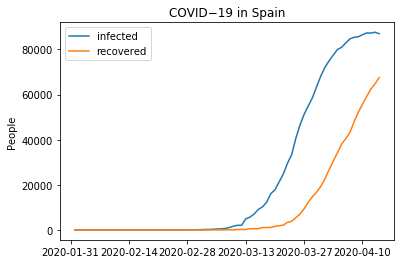

In [3]:
#Plotting real data:
plt.figure(1)
plt.plot(date,infected,label='infected')
plt.plot(date,recovered,label='recovered')
plt.title('COVID−19 in Spain')
plt.ylabel('People')
plt.legend(loc = 'best')
plt.show()

In [4]:
def SIR(I_cond,dt,r,a):
    S0,I0,R0 = I_cond
    dsdt = -r*S0*I0
    didt = r*S0*I0 - a*I0
    drdt = a*I0
    return dsdt,didt,drdt

def SEIR(I_cond,dt,r,a,ro):
    S0,I0,R0,E0 = I_cond
    dsdt = -r*S0*I0
    dedt = r*S0*I0 - ro*E0
    didt = ro*E0 -a*I0
    drdt = a*I0
    return dsdt,dedt,didt,drdt

**Scenario Nº 1**

SIR MODEL

In [5]:
#Caso SIR model sweep:
Ns = np.linspace(10.3**6,10.6**6,50)
Rs = np.linspace(0.545e-6,0.45e-6,50)

mse = []
for n in Ns:
    mse_n = []
    for r in Rs:
        I_cond = np.array([n,infected[0],recovered[0]])
        model_SIR = odeint(SIR,I_cond,dt,args = (r,a))
        mse_r = np.sum((model_SIR[:,1]-infected)**2)/len(infected)
        mse_n.append(mse_r)
    for m in mse_n:
        mse.append(m)
        
best_fit = min(mse)
index = mse.index(best_fit)
Ns_index = int(index/50)
Rs_index = int(index/50)
print('Best fit: number of population'+' '+str(Ns[Ns_index])+', '+'value of r:'+' '+str(Rs[Rs_index]))

Best fit: number of population 1418519.1122559998, value of r: 4.5e-07


In [6]:
#Caso SIR model fitting
def SIR2(I_cond,dt,r):
    S0,I0,R0 = I_cond
    dsdt = -r*S0*I0
    didt = r*S0*I0 - (1/2.3)*I0
    drdt = (1/2.3)*I0
    return dsdt,didt,drdt

def evolution_SIR(t,r,S0):
    return odeint(SIR2,[S0,1,0],t,args = (r,))[:,1]

In [7]:
params_SIR,params_covariance_SIR = curve_fit(evolution_SIR,dt,infected,[0.45e-6,1.4e6]) #Pillo los del sweep
r_value_SIR = params_SIR[0]
S0_value_SIR = params_SIR[1]
print('The value for r is equal to (SIR):',r_value_SIR)
print('The value for the initial susceptible population is (SIR):',S0_value_SIR)

The value for r is equal to (SIR): 3.7798833392236435e-07
The value for the initial susceptible population is (SIR): 1682182.7173673168


In [8]:
#R0<1 and the end of the epidemic:
fit_SIR = evolution_SIR(dt,r_value_SIR,S0_value_SIR)
maximum = max(fit_SIR)
tmax = np.where(fit_SIR==maximum)
print('R_0<1:'+str(tmax[0]))

dt_extended = np.linspace(1,300,300)
fit_SIR_extended = evolution_SIR(dt_extended,r_value_SIR,S0_value_SIR)

fin_SIR = 0
cont = 0
for individual in fit_SIR_extended:
    if individual < 1:
        fin_SIR = cont + 2 #0-indexing
        break 
    else: 
        cont = cont+1
print('No more people will get infected after '+str(fin_SIR)+' days of epidemic.')

R_0<1:[65]
No more people will get infected after 150 days of epidemic.


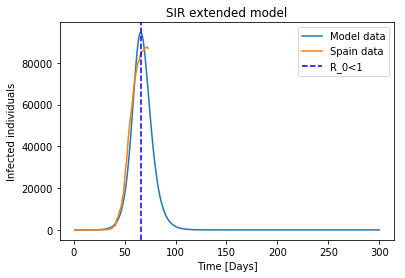

In [9]:
#Representación del resutlado:
plt.figure(1)
plt.plot(dt_extended,fit_SIR_extended,label='Model data')
plt.plot(dt,infected,label='Spain data')
plt.axvline(66,color='blue',linestyle= 'dashed',label='R_0<1')

plt.xlabel('Time [Days]')
plt.ylabel('Infected individuals')
plt.title('SIR extended model')
plt.legend(loc='best')
plt.show()

SEIR MODEL

In [42]:
#Caso SEIR model fitting
def SEIR2(I_cond,dt,r):
    S0,I0,R0,E0 = I_cond
    dsdt = -r*S0*I0
    dedt = r*S0*I0 -(1/5.2)*E0
    didt = (1/5.2)*E0 -(1/2.3)*I0
    drdt = (1/2.3)*I0
    return dsdt,dedt,didt,drdt

def evolution_SEIR(t,r,S0):
    return odeint(SEIR2,[S0,1,0,1],t,args = (r,))[:,2]

In [44]:
params_SEIR,params_covariance_SEIR = curve_fit(evolution_SEIR,dt,infected,[3.1e-6,433410]) #Pillo los del sweep
r_value_SEIR = params_SEIR[0]
S0_value_SEIR = params_SEIR[1]
print('The value for r is equal to (SEIR):',r_value_SEIR)
print('The value for the initial susceptible population is (SEIR):',S0_value_SEIR)

C:\Users\Celia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Celia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [43]:
#R0<1 and the end of the epidemic:
fit_SEIR = evolution_SEIR(dt,r_value_SEIR,S0_value_SEIR)
maximumE = max(fit_SEIR)
tmaxE = np.where(fit_SEIR==maximumE)
print('R_0<1:'+str(tmaxE[0]))
print(fit_SEIR)


fit_SEIR_extended = evolution_SEIR(dt_extended,r_value_SEIR,S0_value_SEIR)
fin_SEIR = 0
contE = 0
for individual in fit_SEIR_extended:
    if individual < 1:
        fin_SEIR = contE + 2 #0-indexing
        break 
    else: 
        contE = contE+1
print('No more people will get infected after '+str(fin_SIR)+' days of epidemic.')

R_0<1:[66]
[ 0.00000000e+000 -5.78962151e-001 -2.88743924e+000 -1.14200169e+001
 -4.23082077e+001 -1.53399075e+002 -5.51513364e+002 -1.96830466e+003
 -6.89707946e+003 -2.28191206e+004 -6.47804722e+004 -1.39478731e+005
 -2.21029643e+005 -2.73635252e+005 -2.77101379e+005 -2.25148343e+005
 -1.19857788e+005  3.11845784e+004  2.16843811e+005  4.25548306e+005
  6.56543038e+005  1.20330820e+006  4.85661783e+006  9.02133865e+217
  1.53452700e+262  3.62530241e+233  1.31585360e-047  9.36407142e-076
  7.61231190e+130  1.28036948e-152  7.60446783e+130  7.60446783e+130
  7.13325098e-067  4.67485107e-062  1.27734658e-152  2.45652619e+198
  6.71082774e-076  6.61020264e-062  9.49373056e+213  1.24889332e+137
  1.33406306e+185  3.53367570e+246  7.27458298e+199  2.04738726e+190
  6.01347002e-154  9.02133613e+217  6.13683785e-071  1.05901196e+218
  7.58739606e+130  6.13683785e-071  1.00385544e+218  9.36403570e-076
  6.13657267e-071  1.07511627e-177  1.43564534e-023  9.36373005e-076
  4.67485107e-062  3.39

C:\Users\Celia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


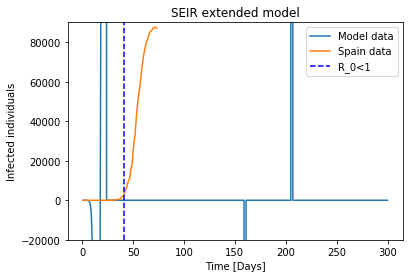

In [54]:
#Representación del resutlado:
plt.figure(1)
plt.plot(dt_extended,fit_SEIR_extended,label='Model data')
plt.plot(dt,infected,label='Spain data')
plt.axvline(41,color='blue',linestyle= 'dashed',label='R_0<1')
plt.ylim(-20000,90000)
plt.xlabel('Time [Days]')
plt.ylabel('Infected individuals')
plt.title('SEIR extended model')
plt.legend(loc='best')
plt.show()